In [1]:
import numpy as np
import pandas as pd
import json
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

# conn = sqlite3.connect('parsed_links.sqlite')
# cur = conn.cursor()

# json_spec = pd.read_sql_query('SELECT id, json FROM Urls', conn)
# df = pd.DataFrame(json_spec)
# # df.set_index('id', inplace=True)
# df.head()

In [2]:

df_pre = pd.read_json('all_properties.json', orient='index', convert_axes=False)
df_pre = df_pre.set_index('Listing Number')
df_pre.head()

,Price,Blurb,Type of Property,Occupation Date,Lease Period,Pets Allowed,Bedrooms,Bathrooms,Lounges,Pool,...,Generator,Backup Water,Description,Bathroom,Pools,Office/study,Special Features 4,Special Features 5,Office/studies,Temperature Control
Listing Number,,,,,,,,,,,,,,,,,,,,,
112004050,R 9 750,2 Bedroom Townhouse to rent in Rynfield,Townhouse,14 March 2023,Negotiable,Yes,2.0,2.0,1.0,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112411669,R 4 450 000,3 Bedroom House for sale in Vredehoek,House,NaN,NaN,Yes,3.0,2.5,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112517289,R 3 950 000,4 Bedroom House for sale in Gardens,House,NaN,NaN,NaN,4.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112534640,R 3 950 000,3 Bedroom House for sale in Gardens,House,NaN,NaN,NaN,3.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112586302,R 14 000,2 Bedroom House to rent in Woodstock,House,01 June 2023,6 Month minimum,Yes,2.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 112004050 to 112473098
Data columns (total 78 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Price                    46 non-null     object 
 1   Blurb                    46 non-null     object 
 2   Type of Property         46 non-null     object 
 3   Occupation Date          26 non-null     object 
 4   Lease Period             17 non-null     object 
 5   Pets Allowed             35 non-null     object 
 6   Bedrooms                 44 non-null     float64
 7   Bathrooms                42 non-null     float64
 8   Lounges                  11 non-null     float64
 9   Pool                     6 non-null      object 
 10  Listing Date             20 non-null     object 
 11  Erf Size                 28 non-null     object 
 12  Floor Size               18 non-null     object 
 13  Special Levy             5 non-null      object 
 14  Rates and Taxes   

### Structure df so that only columns that are most likely to contain data remain for now

In [4]:
df_nulls = df_pre.isnull().sum().sort_values()
df_nulls.head(10)

Price                0
Blurb                0
Type of Property     0
Bedrooms             2
Bathrooms            4
Pets Allowed        11
Erf Size            18
Occupation Date     20
Parking             24
Security            26
dtype: int64

**Keep price,type,bath,bed, blurb**

In [5]:
# List of columns to keep
columns_to_keep = ['Price', 'Blurb', 'Type of Property', 'Bathrooms', 'Bedrooms']

# Drop all columns except the specified list
df = df_pre[columns_to_keep]
df

,Price,Blurb,Type of Property,Bathrooms,Bedrooms
Listing Number,,,,,
112004050,R 9 750,2 Bedroom Townhouse to rent in Rynfield,Townhouse,2.0,2.0
112411669,R 4 450 000,3 Bedroom House for sale in Vredehoek,House,2.5,3.0
112517289,R 3 950 000,4 Bedroom House for sale in Gardens,House,2.0,4.0
112534640,R 3 950 000,3 Bedroom House for sale in Gardens,House,2.0,3.0
112586302,R 14 000,2 Bedroom House to rent in Woodstock,House,1.0,2.0
111996253,R 3 995 000,3 Bedroom House for sale in Vredehoek,House,2.0,3.0
110692569,R 4 249 000,4 Bedroom House for sale in Vredehoek,House,2.0,4.0
111648551,R 7 500,1 Bedroom House to rent in Plumstead,House,1.0,NaN
112504329,R 3 500 000,5 Bedroom House on auction in Vredehoek,House,3.0,5.0


**Check for NaN values**

In [6]:
# check for bedroom NaNs and replace

# Iterate through the rows of the DataFrame
for index, row in df.iterrows():
    # Access the values in each row using column names
    bedroom_value = row['Bedrooms']
    blurb_value = row['Blurb']
    # bedroom number is 1st character in string so simple index slice and cast to float
    bedrooms = float(blurb_value[0])

    # Check if a value is NaN using pd.isna()
    if pd.isna(bedroom_value):
        df.at[index, 'Bedrooms'] = bedrooms

# if any bathroom NaN then drop the row
df.dropna(subset=['Bathrooms'], inplace=True)
        
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 112004050 to 112473098
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             42 non-null     object 
 1   Blurb             42 non-null     object 
 2   Type of Property  42 non-null     object 
 3   Bathrooms         42 non-null     float64
 4   Bedrooms          42 non-null     float64
dtypes: float64(2), object(3)
memory usage: 2.0+ KB
None


C:\Users\Margie\AppData\Local\Temp\ipykernel_20860\2818460469.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Bathrooms'], inplace=True)


,Price,Blurb,Type of Property,Bathrooms,Bedrooms
Listing Number,,,,,
112004050,R 9 750,2 Bedroom Townhouse to rent in Rynfield,Townhouse,2.0,2.0
112411669,R 4 450 000,3 Bedroom House for sale in Vredehoek,House,2.5,3.0
112517289,R 3 950 000,4 Bedroom House for sale in Gardens,House,2.0,4.0
112534640,R 3 950 000,3 Bedroom House for sale in Gardens,House,2.0,3.0
112586302,R 14 000,2 Bedroom House to rent in Woodstock,House,1.0,2.0


In [7]:
# clean price values by removing currency symbol and spaces then cast as int
df['Price'] = df['Price'].str.slice(start=2).str.replace(" ", "").astype('float64')
print(df.info())
df.head()

C:\Users\Margie\AppData\Local\Temp\ipykernel_20860\1146568590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].str.slice(start=2).str.replace(" ", "").astype('float64')


<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 112004050 to 112473098
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             42 non-null     float64
 1   Blurb             42 non-null     object 
 2   Type of Property  42 non-null     object 
 3   Bathrooms         42 non-null     float64
 4   Bedrooms          42 non-null     float64
dtypes: float64(3), object(2)
memory usage: 2.0+ KB
None


,Price,Blurb,Type of Property,Bathrooms,Bedrooms
Listing Number,,,,,
112004050,9750.0,2 Bedroom Townhouse to rent in Rynfield,Townhouse,2.0,2.0
112411669,4450000.0,3 Bedroom House for sale in Vredehoek,House,2.5,3.0
112517289,3950000.0,4 Bedroom House for sale in Gardens,House,2.0,4.0
112534640,3950000.0,3 Bedroom House for sale in Gardens,House,2.0,3.0
112586302,14000.0,2 Bedroom House to rent in Woodstock,House,1.0,2.0


In [8]:
# Extract the Suburb from the blurb
df['Suburb'] = df['Blurb'].str.split('in').str[-1].str.strip()

# drop blurb as no longer needed
df = df.drop('Blurb', axis=1)

df

C:\Users\Margie\AppData\Local\Temp\ipykernel_20860\1112055608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Suburb'] = df['Blurb'].str.split('in').str[-1].str.strip()


,Price,Type of Property,Bathrooms,Bedrooms,Suburb
Listing Number,,,,,
112004050,9750.0,Townhouse,2.0,2.0,Rynfield
112411669,4450000.0,House,2.5,3.0,Vredehoek
112517289,3950000.0,House,2.0,4.0,Gardens
112534640,3950000.0,House,2.0,3.0,Gardens
112586302,14000.0,House,1.0,2.0,Woodstock
111996253,3995000.0,House,2.0,3.0,Vredehoek
110692569,4249000.0,House,2.0,4.0,Vredehoek
111648551,7500.0,House,1.0,1.0,Plumstead
112504329,3500000.0,House,3.0,5.0,Vredehoek


In [9]:
df.describe()

,Price,Bathrooms,Bedrooms
count,4.200000e+01,42.000000,42.00000
mean,1.941351e+06,1.595238,2.52381
std,2.096236e+06,0.627015,0.94322
min,6.500000e+03,1.000000,1.00000
25%,1.123750e+04,1.000000,2.00000
50%,1.400000e+04,1.750000,2.00000
75%,3.995000e+06,2.000000,3.00000
max,5.000000e+06,3.000000,5.00000


In [10]:
df['Suburb'].value_counts()

Suburb
Gardens                 10
Vredehoek                9
Rynfield                 3
Woodstock                3
Observatory              3
Muizenberg               2
Capri                    1
Fish Hoek                1
Table View               1
elands                   1
Silverglade              1
Wynberg                  1
Stellenbosch Central     1
Strand North             1
Hout Bay Central         1
Kenilworth               1
Plumstead                1
Oranjezicht              1
Name: count, dtype: int64

(array([12., 13.,  2.,  1.,  4.,  2.,  1.,  3.,  2.,  2.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

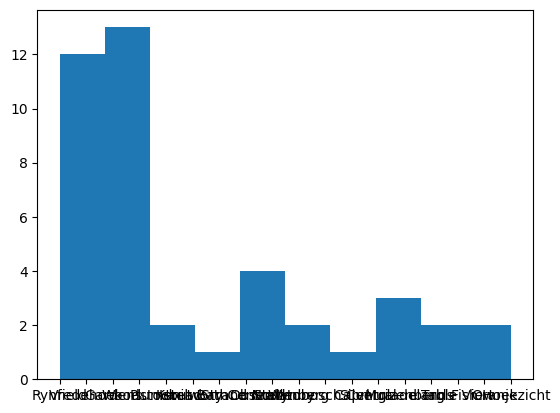

In [11]:
plt.hist(df['Suburb'])